In [1]:
from particle import Particle
from algorithms import BarnesHut, PairWise
import matplotlib.pyplot as plt
from forces import Inverse
import numpy as np

In [2]:
Ns = [10, 100, 1000]
ITERS = 40
THETAS = np.linspace(0, 1, 11)
G = 1

force = Inverse(G)
BH_algorithm = BarnesHut(force)
PW_algorithm = PairWise(force)



In [3]:
errors = {N: [] for N in Ns}
errors_std = {N: [] for N in Ns}

for N in Ns:
    print(N)
    for theta in THETAS:
        BH_algorithm.theta = theta

        temp_errors = []
        for _ in range(ITERS):
            particles = [Particle(charge=1/np.sqrt(N)) for _ in range(N)]

            BH_accelerations = BH_algorithm.calculate_accelerations(particles)
            PW_accelerations = PW_algorithm.calculate_accelerations(particles)

            diff = BH_accelerations - PW_accelerations
            error = np.mean(np.abs(diff))
            temp_errors.append(error)

        errors[N].append(np.mean(temp_errors))
        errors_std[N].append(np.std(temp_errors))       

10
100
1000


In [4]:
regression = np.polyfit(np.log(THETAS[1:]), np.log(errors[1000][1:]), 1)
print(regression[0])

2.3945181494759646


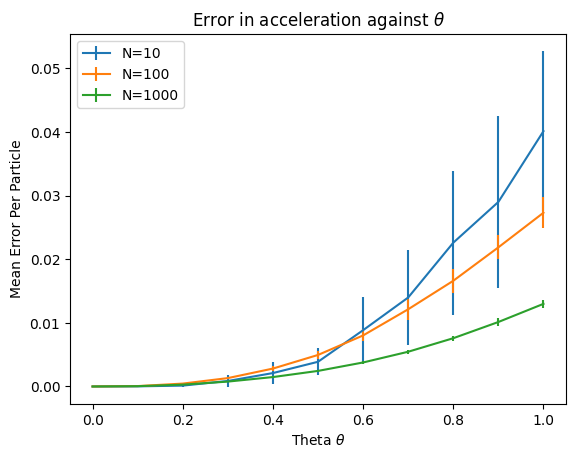

In [10]:
for N in Ns:
    plt.errorbar(THETAS, errors[N], errors_std[N], label=f"{N=}")

plt.xlabel(f"Theta $\\theta$")
plt.ylabel("Mean Error Per Particle")

plt.title(r"Error in acceleration against $\theta$")
# plt.yscale("log")
# plt.xscale("log")
plt.legend(loc="upper left")
plt.show()
# plt.savefig("figures/barnes_hut_error.png", dpi=300)